In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [3]:
dengue = pd.read_csv('dengue.csv')

In [4]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [5]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

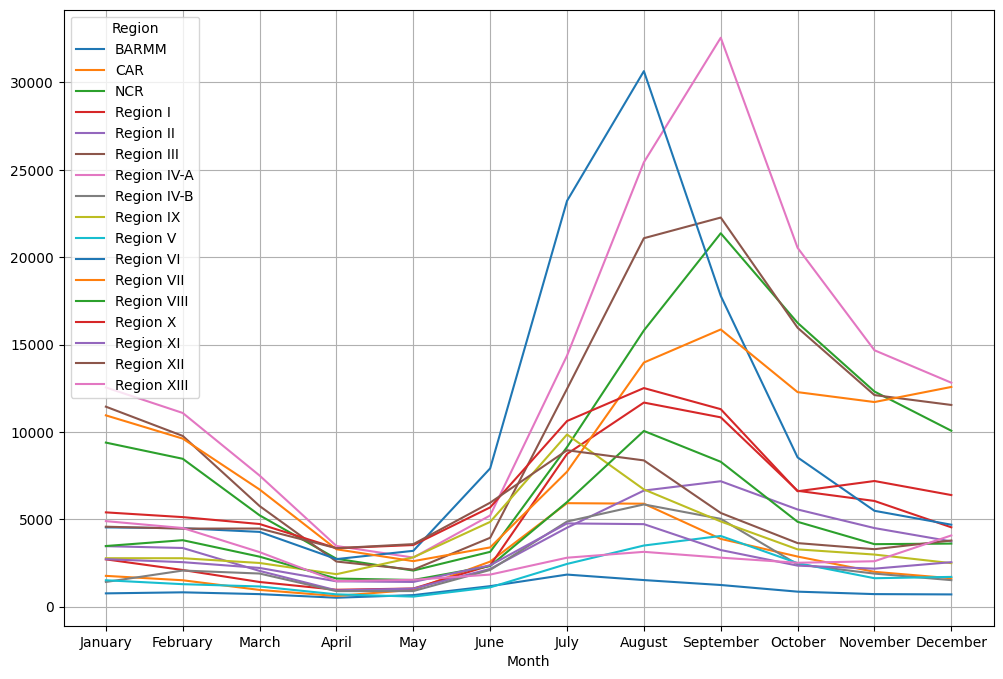

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

monthly_cases = dengue.groupby(["Month", "Region"])["Dengue_Cases"].sum()

monthly_cases.unstack().plot(kind='line')
plt.gcf().set_size_inches(12,8)
plt.grid(True)
plt.xticks(range(0,12), month_order)
plt.show()

In [51]:
rr= dengue.groupby(['Month','Dengue_Deaths']).size()
rr.unstack()

Dengue_Deaths,0,1,2,3,4,5,6,7,8,9,...,481,492,548,584,648,668,1036,1270,1291,1651
Month,,,,,,,,,,,,,,,,,,,,,
Region I,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Region II,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Region III,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Region IV-A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Region IV-B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Region V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Region VI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Region VII,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Region VIII,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


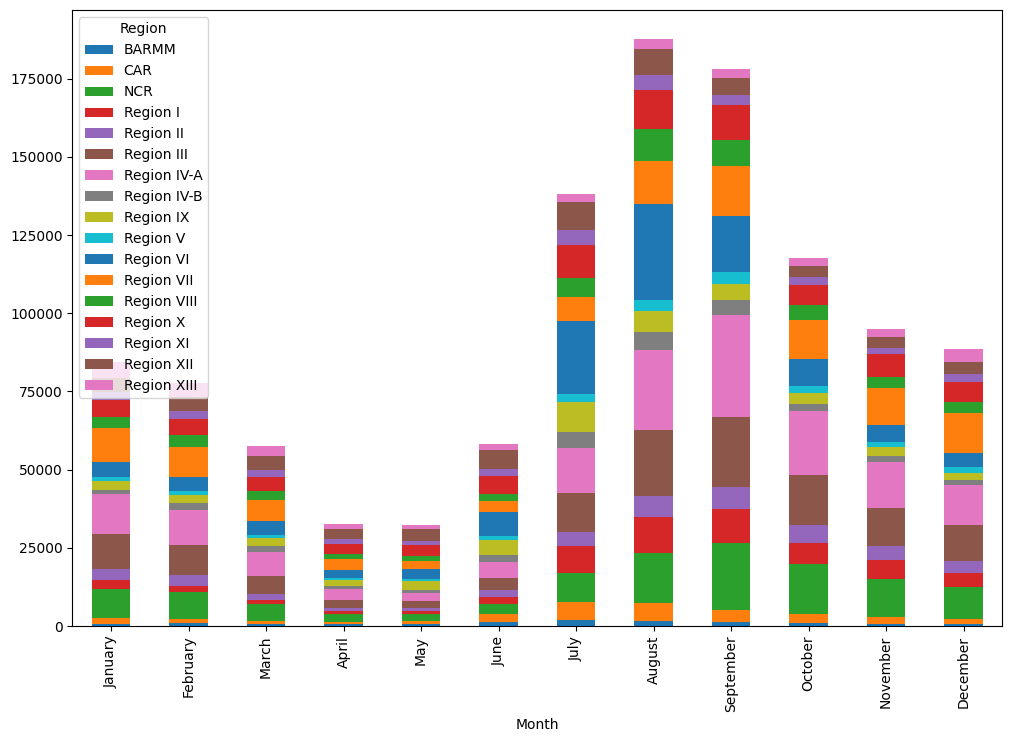

In [33]:
monthly_cases.unstack().plot(kind='bar', stacked=True)
plt.gcf().set_size_inches(12,8)
plt.show()

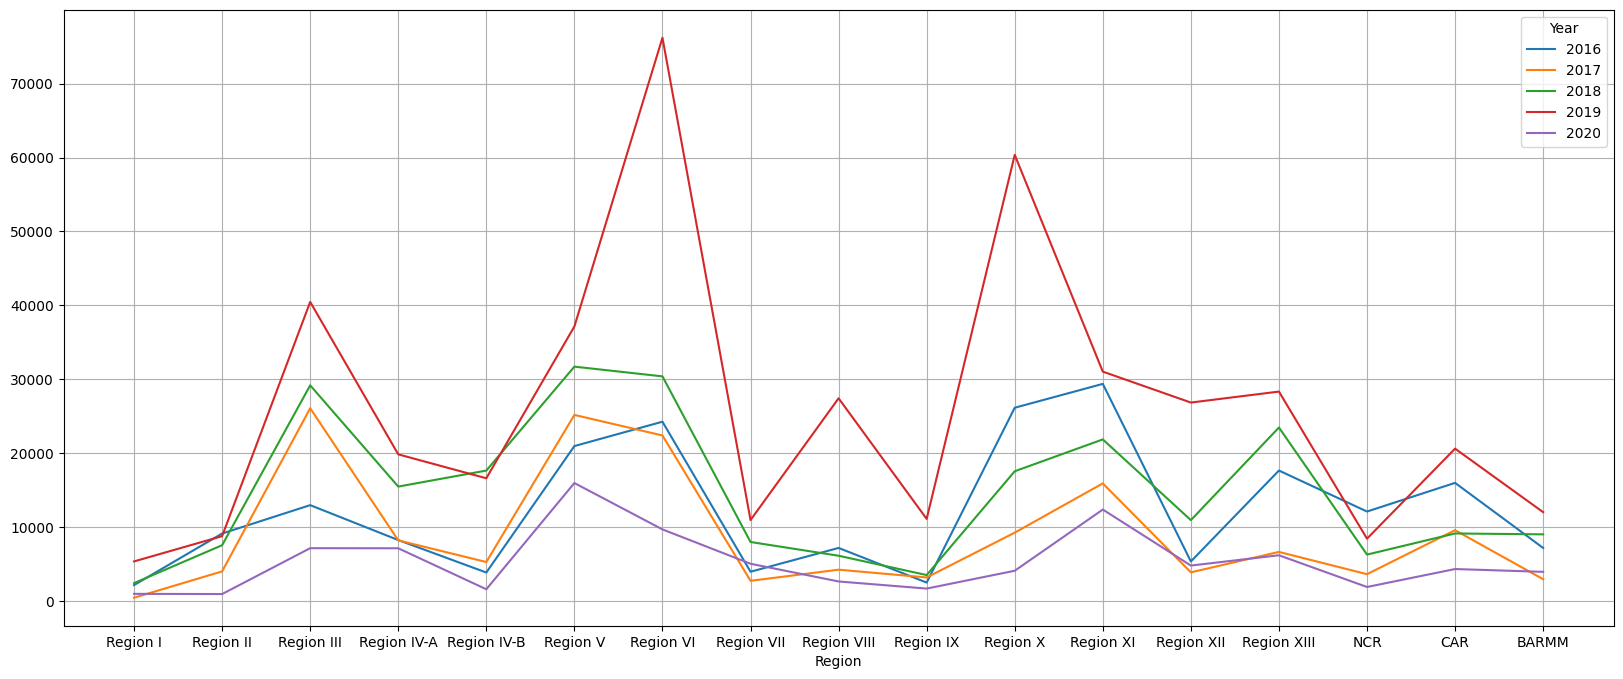

In [42]:
region = ['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', 'Region V', 'Region VI', 'Region VII', 'Region VIII', 'Region IX', 'Region X', 'Region XI','Region XII','Region XIII','NCR','CAR','BARMM']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)

region = dengue.groupby(["Region", "Year"])["Dengue_Cases"].sum()

region.unstack().plot(kind='line')
plt.gcf().set_size_inches(20,8)
plt.grid(True)
plt.xticks(range(0,17), month_order)
plt.show()

In [23]:
dengue.dtypes

Month            category
Year                int64
Region             object
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [28]:
dengue['Dengue_Cases'].value_counts()

Dengue_Cases
207    5
126    4
129    4
203    4
276    4
      ..
100    1
91     1
16     1
13     1
22     1
Name: count, Length: 794, dtype: int64